# Example 2

In [5]:
from CircuitCalculator.Circuit.circuit import transform
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACCurrentSource, Inductance
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, circuit_parser, time_domain_solution
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver
from CircuitCalculator.SimpleAnalysis.PointerDiagram import CurrentPointerDiagram
from CircuitCalculator.SimpleAnalysis.TimeSeries import VoltageTimeSeriesPlot, CurrentTimeSeriesPlot

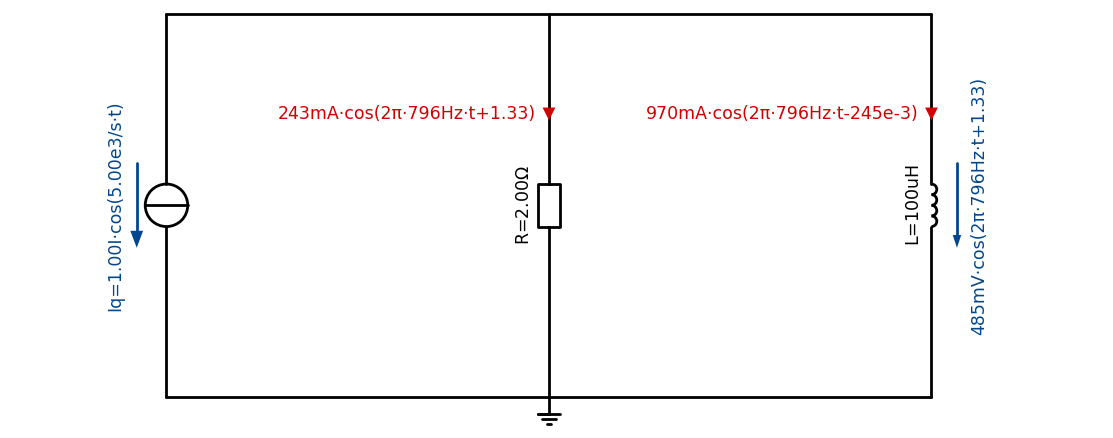

In [6]:
with Schematic(unit=9) as schematic:
    schematic += ACCurrentSource(I=1, w=5000, phi=0.1, name='Iq')
    schematic += (L1:=Line().right())
    schematic += Resistor(R=2, name='R').down()
    schematic += Line().left()
    schematic += Line().right().at(L1.end)
    schematic += Inductance(L=1e-4, name='L').down()
    schematic += Line().left()
    schematic += Ground()
    solution = nodal_analysis_solver(transform(circuit_parser(schematic), w=5000))
    schematic_solution = time_domain_solution(SchematicDiagramAnalyzer(schematic), solution, w=5000, sin=False, hertz=True)
    schematic += schematic_solution.draw_voltage('L')
    schematic += schematic_solution.draw_current('R')
    schematic += schematic_solution.draw_current('L')

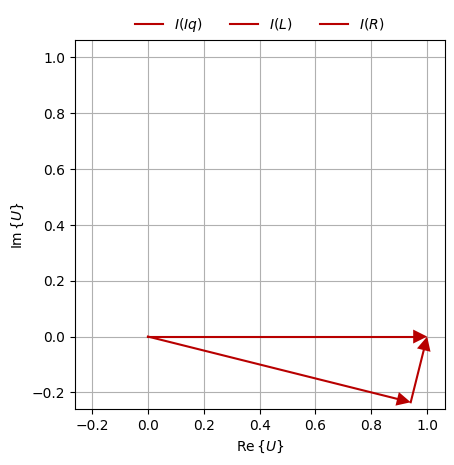

In [9]:
with CurrentPointerDiagram(solution=solution) as pointer_diagram:
    pointer_diagram.add_current_pointer('Iq')
    pointer_diagram.add_current_pointer('L')
    pointer_diagram.add_current_pointer('R', origin='L')

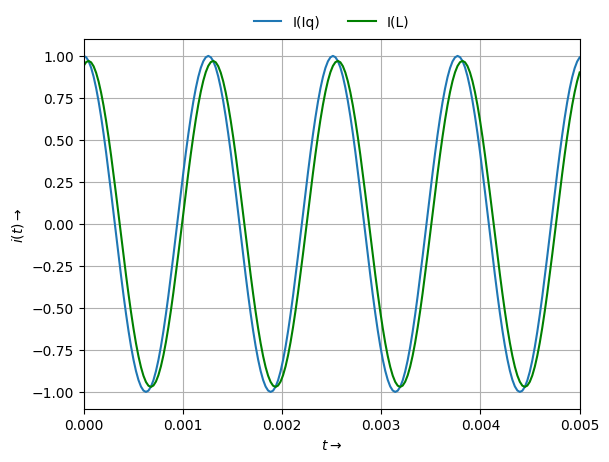

In [11]:
with CurrentTimeSeriesPlot(solution=solution, w=5000, tmax=0.005) as time_series_plot:
    time_series_plot.add_current('Iq')
    time_series_plot.add_current('L', color='green')

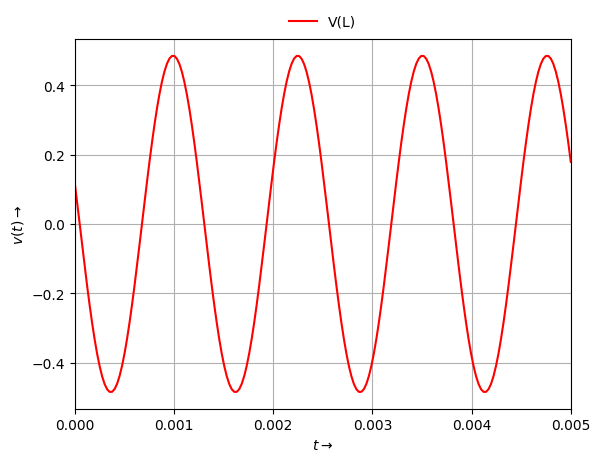

In [12]:
with VoltageTimeSeriesPlot(solution=solution, w=5000, tmax=0.005) as time_series_plot:
    time_series_plot.add_voltage('L', color='red')